In [232]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [233]:
SGA = Table.read("/global/homes/b/barnerg/DESI_SGA/Morphology/SGA_morph.fits")

In [234]:
SGA

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z,r90,r50,r20,z50,g50,C_r50_r90,C_r20_r90,m(r50),m(z50),m(g50),Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
284583,SGA-2020 284583,PGC1753576,1753576,246.63893700000006,25.882395000000002,E,83.58,0.4168694,0.61659503,0.049369153,23.009481,16.281,False,LEDA-20181114,102768,2MASXJ16263037+2552589_GROUP,3,False,246.63132430980986,25.886678155342814,0.92581606,2465p260,246.63899443421053,25.88239593752038,1.0317777,SB26,89.25743,0.7660097,246.63894134159338,25.882421271706928,21.809486,7.683644,7.267518,6.908575,6.584644,8.19172,10.043491,12.2072115,14.66538,17.695236,21.416355,25.87598,30.953333,16.50979,15.567412,14.869183,16.380758,15.444356,14.747147,16.275633,15.342991,14.648945,16.190153,15.260059,14.5695095,16.121006,15.193452,14.5059595,16.06036,15.134916,14.4499445,16.00693,15.085361,14.402035,15.962352,15.040784,14.35771,15.920147,15.0014,14.320146,0.030591438,0.04308892,0.045999907,0.04829483,0.06055945,0.080751404,0.0973,0.124484144,0.20583051,0.01532438,0.015401917,0.015267819,0.013852132,0.013975341,0.01385223,0.012736728,0.012889164,0.012807729,0.0118285,0.011991284,0.011952993,0.011088653,0.011258294,0.011255878,0.01050395,0.010681791,0.010707616,0.010012423,0.010216223,0.010258886,0.009653168,0.009853663,0.009897824,0.0092963725,0.009511294,0.009575142,15.662999,7318.958,8.404456e-05,0.7656309,0.11777708,14.75623

In [235]:
bool_index1 = np.isfinite(SGA['C_r20_r90'])
bool_index2 = np.isfinite(SGA['g_r'])

good_indices = bool_index1 & bool_index2
SGA = SGA[good_indices]

In [236]:
E = SGA[SGA['HUBBLE_TYPE']==-5.0]
L = SGA[(SGA['HUBBLE_TYPE']==-2.0) | (SGA['HUBBLE_TYPE']==0)]
Sb = SGA[(SGA['HUBBLE_TYPE']==2.0) | (SGA['HUBBLE_TYPE']==3.0) | (SGA['HUBBLE_TYPE']==4.0)]
S =  SGA[(SGA['HUBBLE_TYPE']==1.0) | (SGA['HUBBLE_TYPE']==5.0) | (SGA['HUBBLE_TYPE']==6.0) | (SGA['HUBBLE_TYPE']==7.0)]
I = SGA[SGA['HUBBLE_TYPE']==9.0]
Nonclass= SGA[(SGA['HUBBLE_TYPE']<-5.0) | (SGA['HUBBLE_TYPE']>9.0)]
Nonclass = SGA[SGA['HUBBLE_TYPE'].mask]

In [237]:
x = E['C_r20_r90']
y = E['g_r']
a = L['C_r20_r90']
b = L['g_r']
c = Sb['C_r20_r90']
d = Sb['g_r']
e = S['C_r20_r90']
f = S['g_r']
g = I['C_r20_r90']
h = I['g_r']
i = Nonclass['C_r20_r90']
j = Nonclass['g_r']

In [241]:
'''x,y = np.meshgrid(x,y)

X = np.linspace(0, 1, 10)
Y = np.linspace(0, 1, 10)

x,y = np.meshgrid(X,Y)

f1 = np.cos(x*y)
f2 = x-y
#f1 = np.histogram2d(x,y,bins=600)

plt.contourf(x,y,f2)
#plt.contourf(x,y,f1,colors='blue')
#plt.show()'''


"x,y = np.meshgrid(x,y)\n\nX = np.linspace(0, 1, 10)\nY = np.linspace(0, 1, 10)\n\nx,y = np.meshgrid(X,Y)\n\nf1 = np.cos(x*y)\nf2 = x-y\n#f1 = np.histogram2d(x,y,bins=600)\n\nplt.contourf(x,y,f2)\n#plt.contourf(x,y,f1,colors='blue')\n#plt.show()"

/tmp/ipykernel_2309651/113083685.py:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xedges[:-1], yedges[:-1], hist.T,colors='purple',label='Irregular (purple)', levels=10)
/tmp/ipykernel_2309651/113083685.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(Xedges, Yedges, hist.T,colors='grey',label='No class (grey)',levels=10)
/tmp/ipykernel_2309651/113083685.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue',label = 'Elliptical (blue)',levels=10)
/tmp/ipykernel_2309651/113083685.py:18: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='yellow',label = 'Lenticular (yellow)', levels=10)
/tmp/ipykernel_2309651/113083685.py:23: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xedges[:-1], yedges[:-1], hist.T,colors='green',label

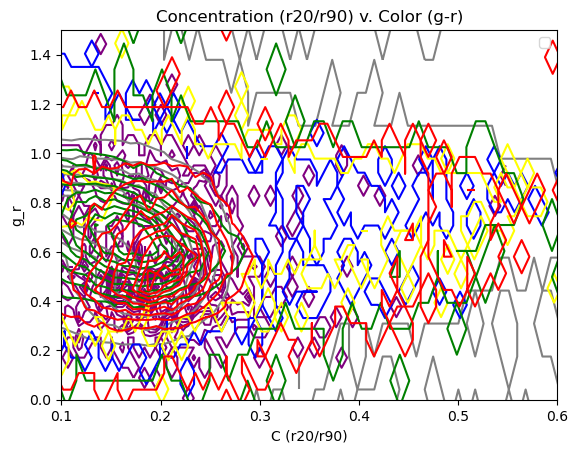

In [263]:
hist, xedges, yedges= np.histogram2d(g, h, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T,colors='purple',label='Irregular (purple)', levels=10)
#plt.colorbar()

hist, xedges, yedges= np.histogram2d(i, j, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(Xedges, Yedges, hist.T,colors='grey',label='No class (grey)',levels=10)
#plt.colorbar()

hist, xedges, yedges= np.histogram2d(x, y, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='blue',label = 'Elliptical (blue)',levels=10)
#plt.colorbar()

hist, xedges, yedges= np.histogram2d(a, b, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, colors='yellow',label = 'Lenticular (yellow)', levels=10)
#plt.colorbar() 

hist, xedges, yedges= np.histogram2d(c, d, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T,colors='green',label='Barred Spiral (green)', levels=10)
#plt.colorbar() 

hist, xedges, yedges= np.histogram2d(e, f, bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T,colors='red',label='Unbarred Spiral (red)', levels=10)
#plt.colorbar() 
 
legend = plt.legend(loc='upper right')
plt.xlabel('C (r20/r90)')
plt.ylabel('g_r')
plt.title('Concentration (r20/r90) v. Color (g-r)')
plt.axis([0.1, 0.6, 0, 1.5])
plt.savefig('C(r20_r90)vColor(g_r)morph.png')


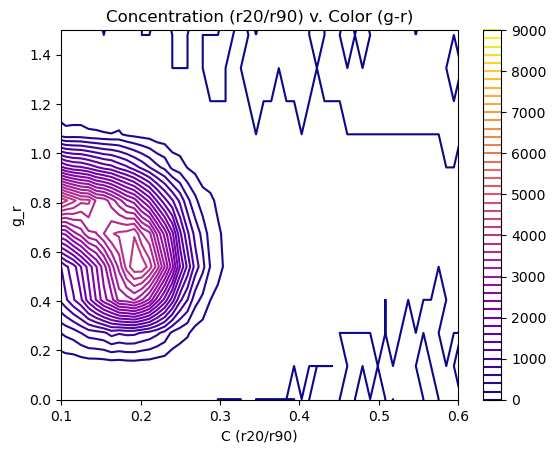

In [264]:
hist, xedges, yedges= np.histogram2d(SGA['C_r20_r90'], SGA['g_r'], bins=100)
Xedges, Yedges = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contour(xedges[:-1], yedges[:-1], hist.T, cmap='plasma',levels=50)
plt.colorbar()
plt.xlabel('C (r20/r90)')
plt.ylabel('g_r')
plt.title('Concentration (r20/r90) v. Color (g-r)')
plt.axis([0.1, 0.6, 0, 1.5])
plt.savefig('C(r20_r90)vColor(g_r).png')